In [30]:
from google.colab import drive #drive'a eriştik
drive.mount('/gdrive/')

Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).


In [31]:
!pip install -q keras #gerekli kütüphaneleri kurmamız lazım
!pip install -q tensorflow

!pip install keras.utils

In [32]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14045255687010013450
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14619377664
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5821375529279704039
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

Drive'a dosyamızı konumlandırıyoruz

In [33]:
import os
os.chdir("/gdrive/My Drive/")

In [34]:
!ls

'Colab Notebooks'
'Model Karşılaştırması: Güçlü Yapay Zekalar'$'\n''.gdoc'
 Udemy_DerinOgrenmeyeGiris


In [35]:
from __future__ import print_function #kurduğumuz kütüphaneleri projeye dahil ediyoruz
import keras
import tensorflow
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from keras import backend as K

import matplotlib.pyplot as plt

In [36]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #MNIST veri setini yüklüyoruz

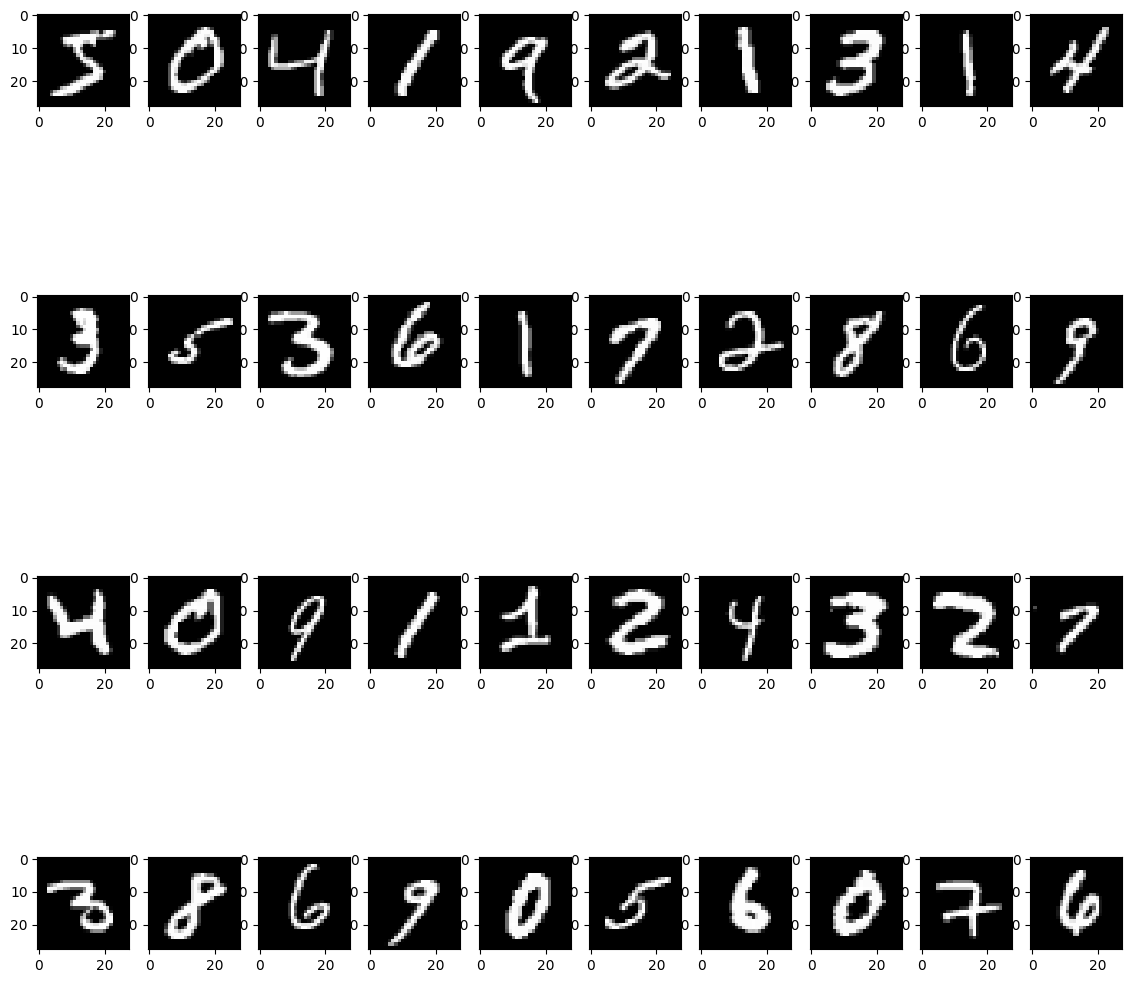

In [38]:
plt.figure(figsize=(14,14)) #yüklenen eğitim verisindeki görüntüleri görselleştiriyoruz
x, y = 10, 4
for i in range(40):
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i], cmap='gray')
plt.show() #ve ekrana bastırıyoruz

In [39]:
#model eğitmek için veri ön işleme (data preprocessing)

batch_size = 128
num_classes = 10
epochs = 12 # eğitim uzun sürmesin diye bu kadarlık yapıyorum

img_rows, img_cols = 28, 28


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [40]:
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes) #One-Hot Encoding
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

# MODEL OLUŞTURMA

In [41]:
model = Sequential()

In [42]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [43]:
#Modeli görselleştirme kısmı
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = tensorflow.keras.optimizers.Adadelta(),
             metrics = ['accuracy'])

In [45]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test)) #model girdiğimiz değerlere göre yani x-y train, batch , epoch vb. değerlere göre eğitiyoruz. .fit komutu ile model öğrenir

Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.1218 - loss: 36.5018 - val_accuracy: 0.4559 - val_loss: 3.9271
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2356 - loss: 14.4429 - val_accuracy: 0.6236 - val_loss: 1.6872
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3191 - loss: 7.3379 - val_accuracy: 0.6088 - val_loss: 1.2509
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3576 - loss: 4.2571 - val_accuracy: 0.5758 - val_loss: 1.3181
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3604 - loss: 2.9369 - val_accuracy: 0.5402 - val_loss: 1.4927
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3529 - loss: 2.3603 - val_accuracy: 0.5326 - val_loss: 1.5495
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3701 - loss: 2.0916 - val_accuracy: 0.5325 - val_loss: 1.5318
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3875 - loss: 1.9656 - val_accuracy

In [46]:
model.save('/mnist_model.h5') #modeli kaydediyoruz

In [47]:
score = model.evaluate(x_test, y_test, verbose=0) #modelin ne kadar başarılı olduğunu test ediyoruz
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 1.2282992601394653
Test Accuracy: 0.6208999752998352


### Rastgele değer için test işlemi

In [48]:
model_test = model.save('save_models/mnist_model.h5')

In [49]:
test_image = x_test[32]
y_test[32]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

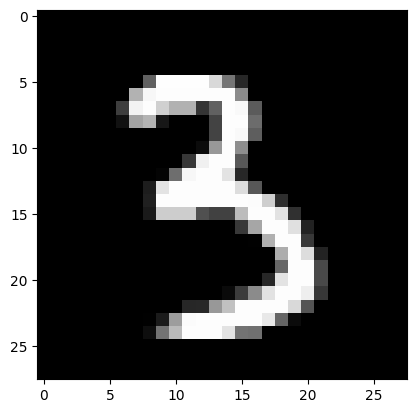

In [50]:
plt.imshow(test_image.reshape(28,28), cmap='gray', vmin=2, vmax=255) #modelimiz beklediğimiz şekilde sıkıntısz çalışıyor